In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr
from rosbags.highlevel import AnyReader

import numpy as np

In [30]:
bag_path = Path('../../../datasets/odometry_data/exp2')
topic_name = '/monica/localization_poses'


poses_data = {
    'timestamp': [],
    'time_sec': [],
    'position': {
        'x': [],
        'y': [],
        'z': []
    },
    'orientation': {
        'x': [],
        'y': [],
        'z': [],
        'w': []
    },
    'covariance': []
}
    
with AnyReader([bag_path]) as reader:
    # Print bag info
    print(f"Bag duration: {reader.duration / 1e9:.2f} seconds")
    print(f"Message count: {reader.message_count}")

    connection = [x for x in reader.connections if x.topic == topic_name]

    
    # Read messages
    for connection, timestamp, rawdata in reader.messages(connections=connection):
        msg = reader.deserialize(rawdata, connection.msgtype)
        
        # Extract pose data
        poses_data['timestamp'].append(timestamp)
        poses_data['time_sec'].append(timestamp / 1e9)

        poses_data['position']['x'].append(msg.pose.pose.position.x)
        poses_data['position']['y'].append(msg.pose.pose.position.y)
        poses_data['position']['z'].append(msg.pose.pose.position.z)
        
        poses_data['orientation']['x'].append(msg.pose.pose.orientation.x)
        poses_data['orientation']['y'].append(msg.pose.pose.orientation.y)
        poses_data['orientation']['z'].append(msg.pose.pose.orientation.z)
        poses_data['orientation']['w'].append(msg.pose.pose.orientation.w)
        
        poses_data['covariance'].append(msg.pose.covariance)

poses_data['covariance'] = np.array(poses_data['covariance'])
print(f"Read {len(poses_data)} pose messages")

Bag duration: 27.43 seconds
Message count: 28
Read 5 pose messages


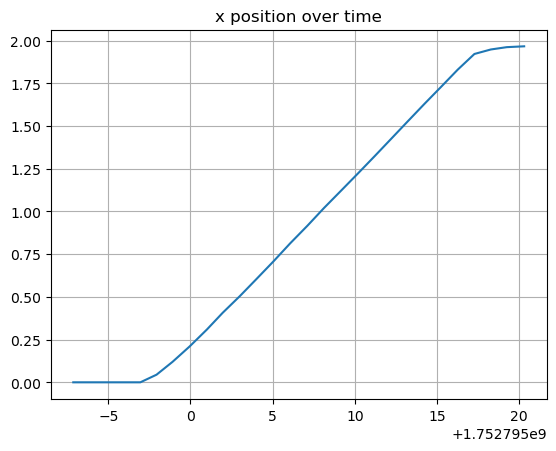

In [31]:
plt.plot(
    poses_data['time_sec'],
    poses_data['position']['x']
)
plt.grid(True)
plt.title('x position over time')
plt.show()

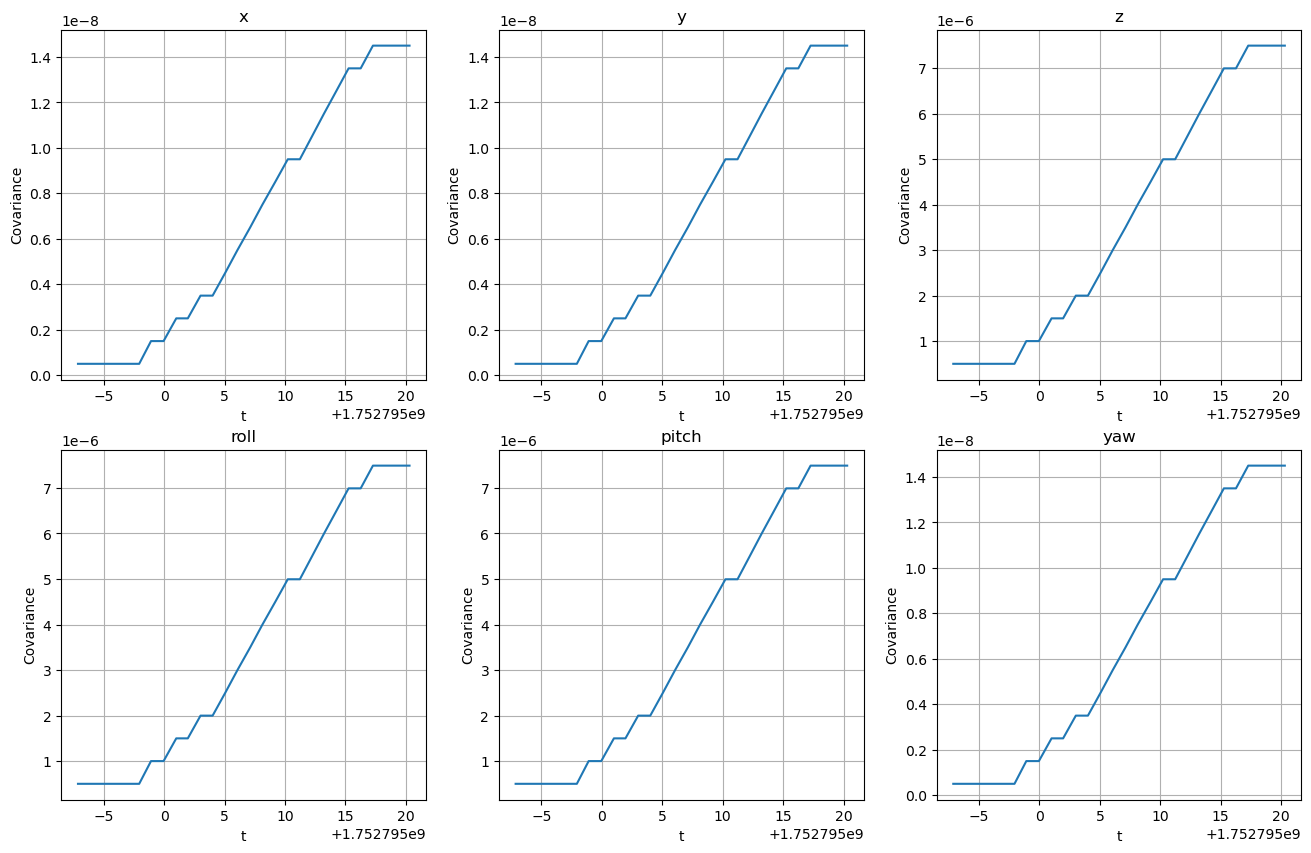

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))


def plot_covariance(ax, data_axis, title):
    ax.plot(
        poses_data['time_sec'],
        poses_data['covariance'][:, data_axis]    
    )
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlabel('t')
    ax.set_ylabel('Covariance')

plot_covariance(axes[0, 0], 0, 'x')
plot_covariance(axes[0, 1], 7, 'y')
plot_covariance(axes[0, 2], 14, 'z')
plot_covariance(axes[1, 0], 21, 'roll')
plot_covariance(axes[1, 1], 28, 'pitch')
plot_covariance(axes[1, 2], 35, 'yaw')

plt.show()